In [ ]:
#Importing libraries for data processing and model training
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, auc, hamming_loss, jaccard_score)
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, LSTM, GRU, GlobalMaxPooling1D, TimeDistributed,
                                     Dense, MultiHeadAttention, LayerNormalization, Lambda,
                                     Flatten, Concatenate, Embedding, Reshape)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
class StockDataProcessor:
    """A class for preprocessing and feature engineering on stock data."""

    def __init__(self, data_path):
        """
        Initialize the StockDataProcessor object.

        Parameters:
        data_path (str): The file path to the CSV containing the stock data.
        """
        self.data = pd.read_csv(data_path)
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data.set_index('Date', inplace=True)
        self.data.drop(columns=['Adj Close'], inplace=True)

    def calculate_technical_indicators(self):
        """
        Calculate technical indicators for the stock data.

        Returns:
        pandas.DataFrame: DataFrame with technical indicators appended.
        """
        # Method implementation...

    def calculate_daily_returns(self):
        """
        Calculate daily returns for the stock data.

        Returns:
        pandas.DataFrame: DataFrame with daily returns appended.
        """
        # Method implementation...

    def create_labels(self, threshold=0.5):
        """
        Create labels for different time horizons based on daily returns.

        Parameters:
        threshold (float): The threshold for labeling buy/sell/hold.

        Returns:
        pandas.DataFrame: DataFrame with labels appended.
        """
        # Method implementation...

class StockDataProcessor:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data.set_index('Date', inplace=True)
        self.data.drop(columns=['Adj Close'], inplace=True)

    def calculate_technical_indicators(self):
        df = self.data.copy()
        try:
            df['Change %'] = df['Close'].pct_change() * 100
            df['SMA'] = df['Close'].rolling(window=20).mean()
            df['close_diff'] = df['Close'].diff()
            df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
            df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
            df['MACD'] = df['EMA12'] - df['EMA26']
            df['signal_line'] = df['MACD'].ewm(span=9, adjust=False).mean()
            df['EMA15'] = df['Close'].ewm(span=15, adjust=False).mean()
            df['EMA30'] = df['Close'].ewm(span=30, adjust=False).mean()
            df['EMA45'] = df['Close'].ewm(span=45, adjust=False).mean()
            df['TRIX'] = (df['EMA15'] - df['EMA30']) / df['EMA45']

            # Remaining technical indicators calculations...

            return df

        except KeyError as e:
            print(f"Error: {e}. Please check if the 'Close' column is present in the DataFrame.")
            return None

    def calculate_daily_returns(self):
        df = self.data.copy()
        df['Daily_Return'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1) * 100
        df['Daily_Return1'] = (df['Close'] - df['Close'].shift(3)) / df['Close'].shift(3) * 100
        df['Daily_Return2'] = (df['Close'] - df['Close'].shift(7)) / df['Close'].shift(7) * 100
        df['Daily_Return3'] = (df['Close'] - df['Close'].shift(10)) / df['Close'].shift(10) * 100
        return df

    def create_labels(self, threshold=0.5):
        df = self.data.copy()
        df['label_1d'] = np.where(df['Daily_Return'] > threshold, 1, np.where(df['Daily_Return'] < -threshold, 0, 2))
        df['label_3d'] = np.where(df['Daily_Return1'] > threshold, 1, np.where(df['Daily_Return1'] < -threshold, 0, 2))
        df['label_7d'] = np.where(df['Daily_Return2'] > threshold, 1, np.where(df['Daily_Return2'] < -threshold, 0, 2))
        df['label_10d'] = np.where(df['Daily_Return3'] > threshold, 1, np.where(df['Daily_Return3'] < -threshold, 0, 2))
        return df

# Usage
data_processor = StockDataProcessor("path_to_stock_data.csv")
data_with_indicators = data_processor.calculate_technical_indicators()
data_with_returns = data_processor.calculate_daily_returns()
data_with_labels = data_processor.create_labels()

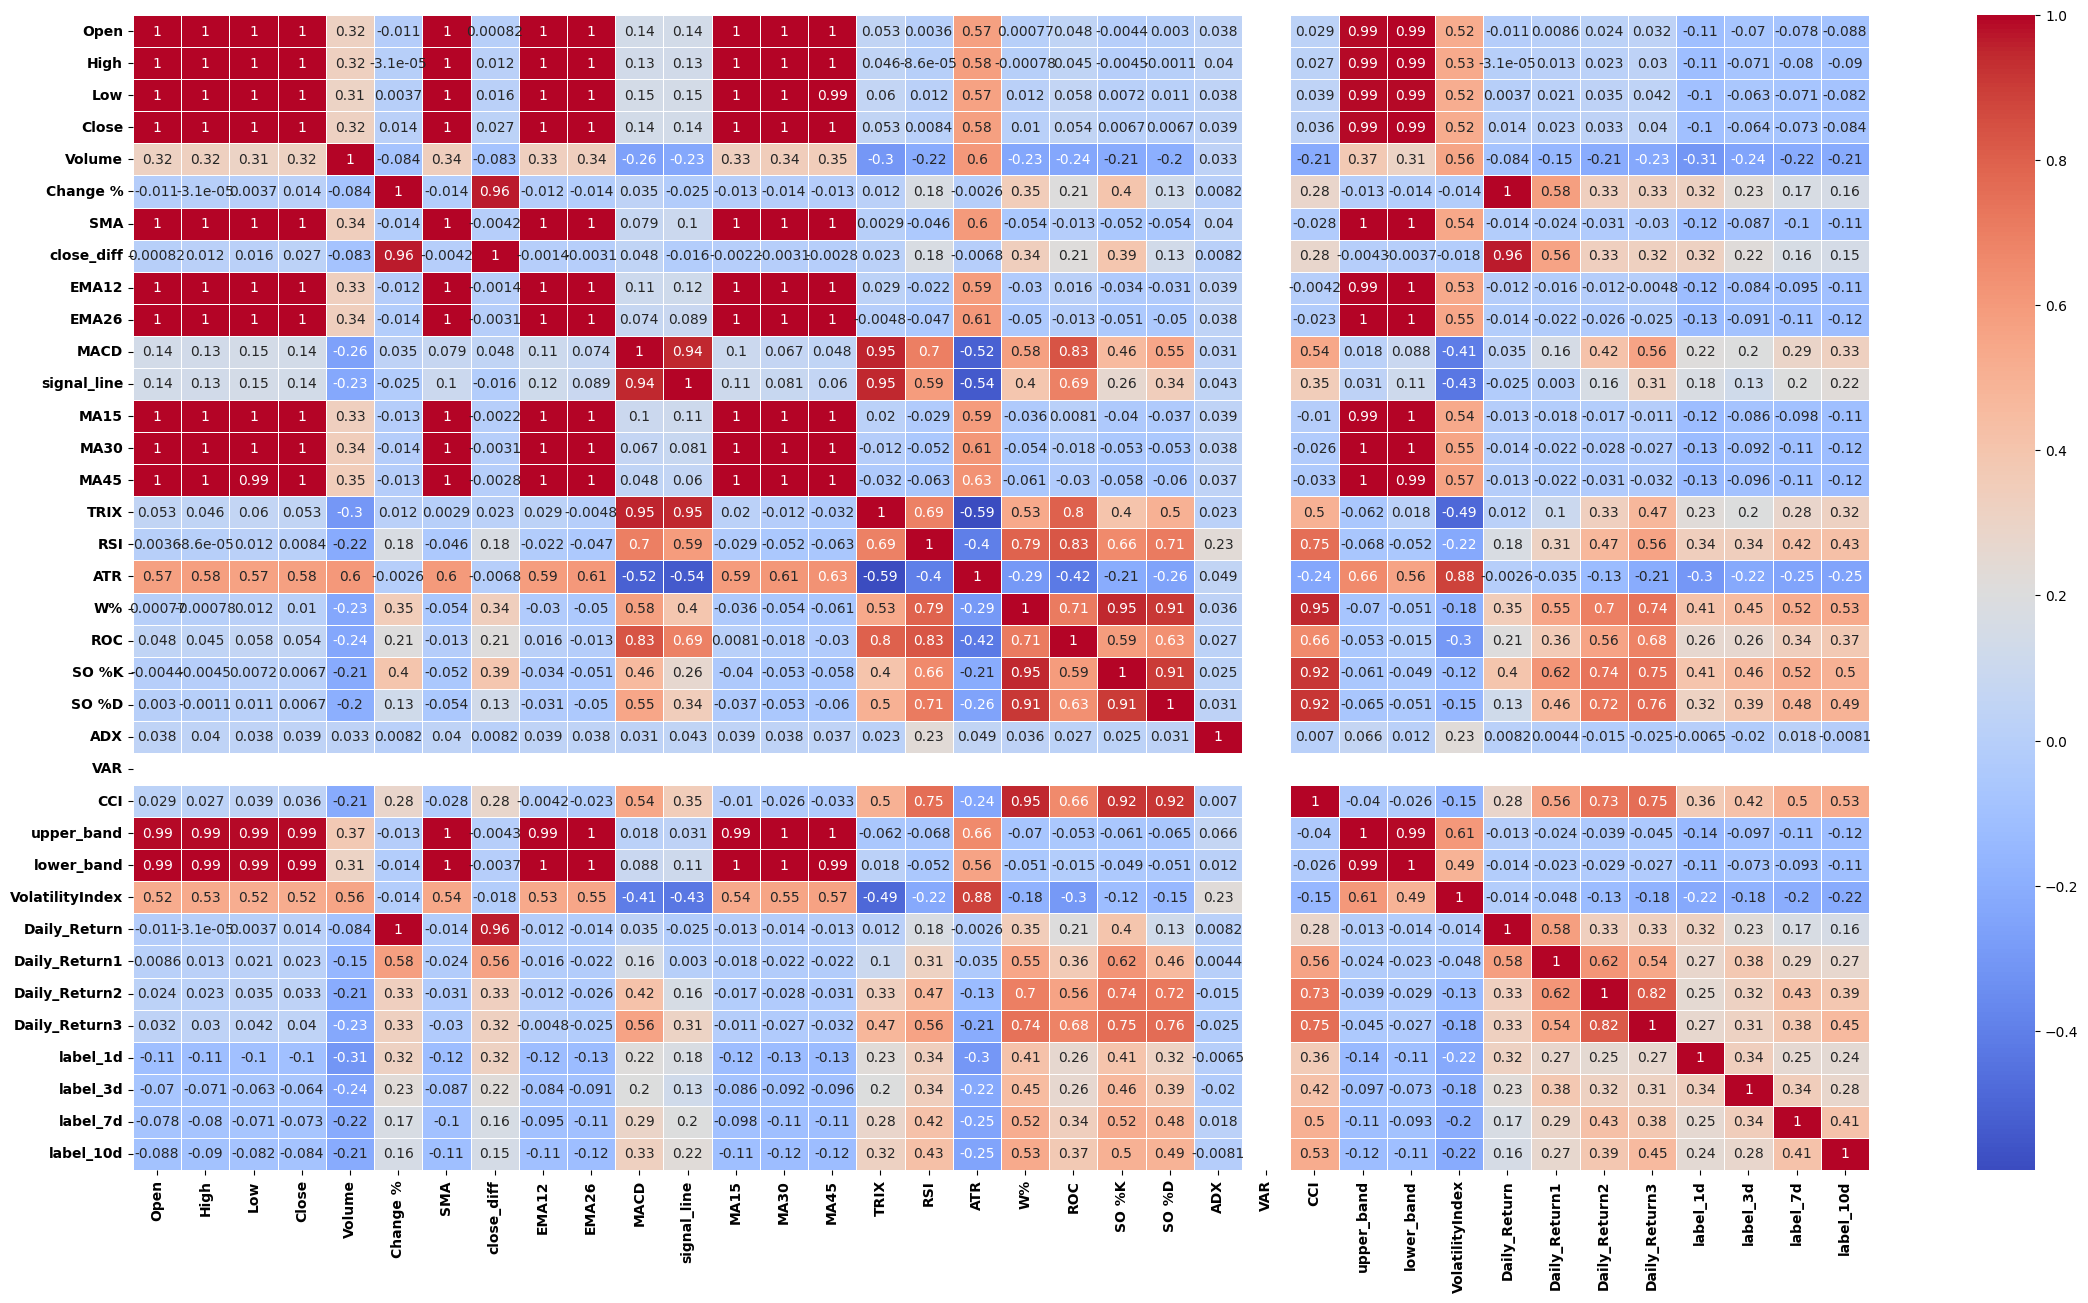

In [ ]:
def plot_correlation_heatmap(self):
        """
        Plot a correlation heatmap for the stock data.

        Returns:
        None
        """
        corr_matrix = self.data.corr()  # Calculate correlation matrix

        # Create heatmap using seaborn
        plt.figure(figsize=(28, 15))
        ax = sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, linewidths=0.5)

        # Make labels bold using matplotlib (for seaborn < 0.6.0)
        plt.setp(ax.xaxis.get_majorticklabels(), weight="bold")  # Set weight to "bold" for x-axis labels
        plt.setp(ax.yaxis.get_majorticklabels(), weight="bold")  # Set weight to "bold" for y-axis labels
        plt.show()

data_processor.plot_correlation_heatmap()

In [ ]:
def calculate_label_counts(self):

  """
  Calculate label counts for different time horizons.

  Returns:
  dict: A dictionary containing label counts for each time horizon.
  """
  label_counts = {
  'label_1d': self.data['label_1d'].value_counts(),
  'label_3d': self.data['label_3d'].value_counts(),
  'label_7d': self.data['label_7d'].value_counts(),
  'label_10d': self.data['label_10d'].value_counts()
  }
  return label_counts

Label_1d counts: 2    1436
1     749
0     583
Name: label_1d, dtype: int64 Labels_3d counts: 1    1157
2     856
0     755
Name: label_3d, dtype: int64 Labels_7d counts: 1    1385
0     798
2     585
Name: label_7d, dtype: int64 Labels_10d counts: 1    1509
0     797
2     462
Name: label_10d, dtype: int64


In [ ]:
class StockPricePredictionModel:
    def __init__(self, features, labels, time_step=5):
        self.features = features
        self.labels = labels
        self.time_step = time_step

    def prepare_data(self):
        # Initialize TimeSeriesSplit
        tscv = TimeSeriesSplit(n_splits=3)

        # Initialize lists to store metrics
        accuracy_list = []
        precision_list = []
        recall_list = []
        f1_list = []
        auc_list = []
        hamming_loss_list = []
        jaccard_similarity_list = []

        # Define arrays to store true labels and predicted labels
        true_labels_all = []
        predicted_labels_all = []

        # Loop for training and evaluation
        for train_index, test_index in tscv.split(self.features):
            # Split data into training and test sets
            X_train, X_test = self.features.iloc[train_index], self.features.iloc[test_index]
            y_train, y_test = self.labels.iloc[train_index], self.labels.iloc[test_index]

            # Standardize features
            scaler = MaxAbsScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Reshape data for the transformer model
            X_train_reshaped = np.array([X_train[i-self.time_step:i] for i in range(self.time_step, len(X_train)+1)])
            X_test_reshaped = np.array([X_test[i-self.time_step:i] for i in range(self.time_step, len(X_test)+1)])

            # Ensure y_test matches the number of samples in X_test_reshaped
            y_test = y_test.iloc[self.time_step-1:]

            # Define model architecture
            input_layer = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), name="input_layer")
            # Add your model architecture here...

            # Compile the model
            model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model with early stopping
            history = model.fit([X_train_reshaped, y_train['label_1d'], y_train['label_3d'], y_train['label_7d'], y_train['label_10d']], y_train,
                                epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

            # Make predictions on the test set
            predictions = model.predict([X_test_reshaped, y_test['label_1d'], y_test['label_3d'], y_test['label_7d'], y_test['label_10d']])

            # Convert predictions to binary labels (0 or 1)
            binary_predictions = (predictions > 0.5).astype(int)

            # Append true labels and predicted labels
            true_labels_all.extend(y_test.values)
            predicted_labels_all.extend(binary_predictions)

            # Calculate and store evaluation metrics
            accuracy_list.append(accuracy_score(np.array(true_labels_all), np.array(predicted_labels_all)))
            precision_list.append(precision_score(np.array(true_labels_all), np.array(predicted_labels_all), average='micro'))
            recall_list.append(recall_score(np.array(true_labels_all), np.array(predicted_labels_all), average='micro'))
            f1_list.append(f1_score(np.array(true_labels_all), np.array(predicted_labels_all), average='micro'))
            auc_list.append(roc_auc_score(np.array(true_labels_all), np.array(predicted_labels_all), average='micro'))
            hamming_loss_list.append(hamming_loss(np.array(true_labels_all), np.array(predicted_labels_all)))
            jaccard_similarity_list.append(jaccard_score(np.array(true_labels_all), np.array(predicted_labels_all), average='micro'))

            # Plot ROC curve for all labels
            self.plot_roc_curve(y_test.values, predictions)

            # Plot accuracy
            self.plot_metric(history, 'accuracy', 'Accuracy of the proposed MLSC model')

            # Plot loss
            self.plot_metric(history, 'loss', 'Loss of the proposed MLSC model')

            # Display evaluation metrics
            print("Accuracy:", accuracy_list[-1])
            print("Precision:", precision_list[-1])
            print("Recall:", recall_list[-1])
            print("F1 Score:", f1_list[-1])
            print("AUC Score:", auc_list[-1])
            print("Hamming Loss:", hamming_loss_list[-1])
            print("Jaccard Similarity:", jaccard_similarity_list[-1])

    def plot_roc_curve(self, true_labels, predicted_probabilities):
        # Plot ROC curve for all labels
        plt.figure(figsize=(8, 6))
        for j in range(4):
            fpr, tpr, _ = roc_curve(true_labels[:, j], predicted_probabilities[:, j])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label='ROC curve for label {} (area = {:.2f})'.format(j, roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.grid(True)
        plt.legend(loc="lower right")
        plt.show()

    def plot_metric(self, history, metric, title):
        plt.figure(figsize=(8, 6))
        plt.plot(history.history[metric], label='Training ' + metric)
        plt.plot(history.history['val_' + metric], label='Validation ' + metric)
        plt.title(title)
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.grid(True)
        plt.legend()
        plt.show()

# Usage
model = StockPricePredictionModel(features=bse[['Open', 'High', 'Low', 'Close', 'Volume', 'CCI', 'upper_band', 'lower_band', 'VolatilityIndex', 'EMA12', 'EMA26',
                  'EMA15', 'EMA30', 'EMA45', 'MACD', 'TRIX', 'RSI', 'ATR', 'signal_line', 'SMA']],
                                  labels=bse[['label_1d', 'label_3d', 'label_7d', 'label_10d']])
model.prepare_data()

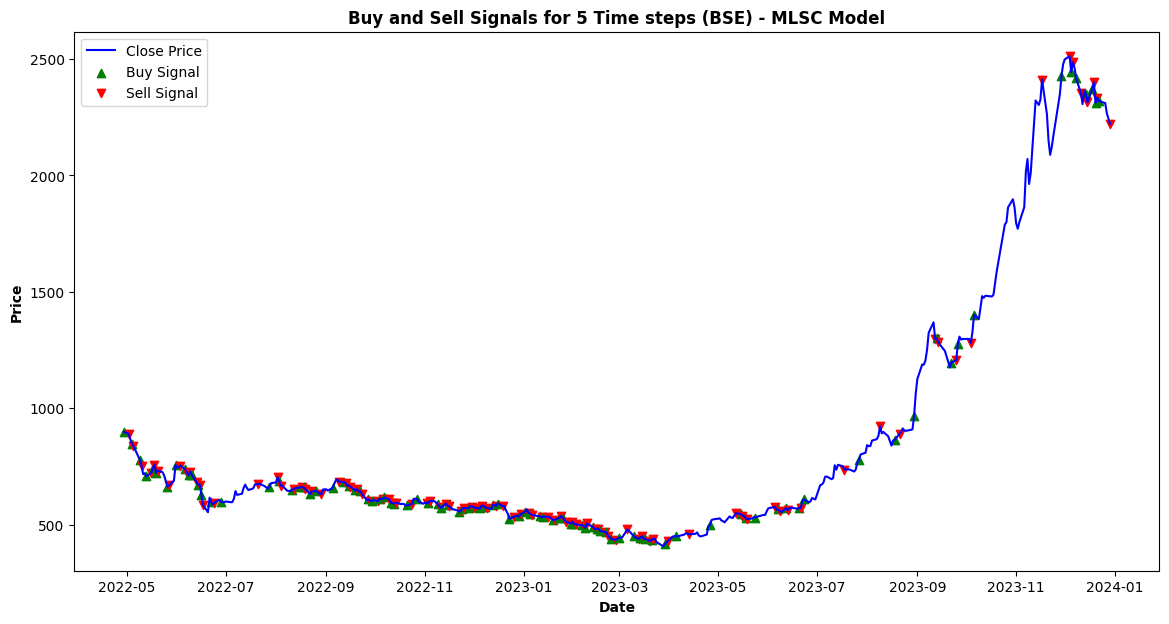

In [ ]:
class TradingSimulator:
    def __init__(self, predictions, prices):
        self.predictions = predictions
        self.prices = prices
        self.capital = 100000  # Initial capital
        self.position = 0  # Initial position
        self.portfolio_value = [self.capital]  # List to store portfolio value over time
        self.orders = []  # List to store buy/sell orders
        self.shares = 0  # Initialize shares variable
        self.buy_signal_count = 0
        self.sell_signal_count = 0
        self.last_sell_price = 0  # Store the last sell price
        self.trailing_stop_loss = 0  # Initialize trailing stop-loss threshold

    def simulate_trading(self):
        for i, prediction in enumerate(self.predictions):
            price = self.prices[i]

            # Buy on 1-day and not already in position
            if prediction[0] == 1 and self.position == 0:
                self.shares = self.capital / price
                self.capital = 0
                self.position = 1
                self.orders.append((i, 'BUY', price, self.shares))
                self.buy_signal_count += 1
                self.trailing_stop_loss = price * 0.9  # Set initial trailing stop-loss threshold

            # Sell if at least two out of three (3-day, 7-day, and 10-day) predict a downtrend
            elif self.position == 1 and np.sum(prediction[1:]) >= 2:
                self.capital = self.shares * price
                self.shares = 0
                self.position = 0
                self.orders.append((i, 'SELL', price, self.capital))
                self.sell_signal_count += 1
                self.last_sell_price = price

            # Hold if price is still moving upward on the 3-day, 7-day, or 10-day
            elif self.position == 1 and (prediction[1] == 0 or prediction[2] == 0 or prediction[3] == 0):
                if price < self.last_sell_price:  # Close position if next price goes below current price
                    self.capital = self.shares * price
                    self.shares = 0
                    self.position = 0
                    self.orders.append((i, 'SELL', price, self.capital))
                    self.sell_signal_count += 1
                elif price < self.trailing_stop_loss:  # Implement trailing stop-loss mechanism
                    self.capital = self.shares * price
                    self.shares = 0
                    self.position = 0
                    self.orders.append((i, 'SELL', price, self.capital))
                    self.sell_signal_count += 1
                else:
                    self.trailing_stop_loss = max(self.trailing_stop_loss, price * 0.9)  # Update trailing stop-loss threshold if price increases

            # Append portfolio value
            self.portfolio_value.append(self.capital + self.shares * price)

        # Add a final sell signal if position is still open at the end
        if self.position == 1:
            self.capital = self.shares * self.prices[-1]
            self.orders.append((len(self.prices) - 1, 'SELL', self.prices[-1], self.capital))
            self.sell_signal_count += 1

    def calculate_financial_metrics(self):
        initial_portfolio_value = self.portfolio_value[0]  # Initial capital
        final_portfolio_value = self.portfolio_value[-1]  # Final capital after trading
        returns = (final_portfolio_value - initial_portfolio_value) / initial_portfolio_value
        max_drawdown = self.calculate_maximum_drawdown()
        volatility = np.std(self.portfolio_value)
        sharpe_ratio = returns / volatility
        return returns, max_drawdown, volatility, sharpe_ratio, final_portfolio_value

    def calculate_maximum_drawdown(self):
        peak = self.portfolio_value[0]
        max_drawdown = 0

        for value in self.portfolio_value:
            if value > peak:
                peak = value
            else:
                drawdown = (peak - value) / peak
                max_drawdown = max(max_drawdown, drawdown)

        return max_drawdown * 100  # Return as percentage

    def plot_portfolio_value(self):
        dates = range(len(self.prices))
        plt.figure(figsize=(14, 7))
        plt.plot(dates, self.portfolio_value, label='Portfolio Value', color='blue')
        plt.title('Portfolio Value Over Time - MLSC Model')
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value')
        plt.legend()
        plt.show()

    def plot_buy_sell_signals(self):
        dates = range(len(self.prices))
        plt.figure(figsize=(14, 7))
        plt.plot(dates, self.prices, label='Close Price', color='blue')
        for order in self.orders:
            if order[1] == 'BUY':
                plt.scatter(dates[order[0]], order[2], color='green', marker='^')
            else:
                plt.scatter(dates[order[0]], order[2], color='red', marker='v')

        # Add legend labels separately
        plt.scatter([], [], color='green', marker='^', label='Buy Signal')
        plt.scatter([], [], color='red', marker='v', label='Sell Signal')

        plt.title('Buy and Sell Signals for 5 Time steps (BSE) - MLSC Model', fontsize=11)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# Example usage:
# Initialize TradingSimulator with predictions and prices
trading_simulator = TradingSimulator(binary_predictions, test_prices)

# Simulate trading
trading_simulator.simulate_trading()

# Calculate financial metrics
returns, max_drawdown, volatility, sharpe_ratio, final_portfolio_value = trading_simulator.calculate_financial_metrics()

# Print financial metrics
print("Returns:", returns)
print("Maximum Drawdown:", max_drawdown)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)
print("Final Portfolio Value:", final_portfolio_value)

# Plot portfolio value over time
trading_simulator.plot_portfolio_value()

# Plot buy and sell signals
trading_simulator.plot_buy_sell_signals()